### Used in built-in packages

In [4]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Path to the dataset
train_dir = r'C:\Users\USER\OneDrive\Desktop\Mtech\s2\archive (1)\final dataset used for oil spill\dataset-final\dataset\train'
test_dir = r'C:\Users\USER\OneDrive\Desktop\Mtech\s2\archive (1)\final dataset used for oil spill\dataset-final\dataset\test'

# Image parameters
img_width, img_height = 128, 128  # Resize images
batch_size = 32  # Batch size for training
num_classes = 2  # Binary classification (oil spill or not)

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,  # Split 20% of training data for validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Only rescaling for test data

# Flow images in batches from the directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',  # Binary classification
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
epochs = 20
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)


Found 2240 images belonging to 2 classes.
Found 560 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


D:\jupyter\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\jupyter\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.5740 - loss: 0.6895 - val_accuracy: 0.7232 - val_loss: 0.5905
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.6950 - loss: 0.6310 - val_accuracy: 0.7357 - val_loss: 0.5080
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.7277 - loss: 0.5662 - val_accuracy: 0.7696 - val_loss: 0.4649
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.7674 - loss: 0.4981 - val_accuracy: 0.8214 - val_loss: 0.4448
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.7843 - loss: 0.4579 - val_accuracy: 0.7554 - val_loss: 0.4872
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.7817 - loss: 0.4882 - val_accuracy: 0.8196 - val_loss: 0.3776
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.7962 - loss: 0.4374 - val_accuracy: 0.8321 - val_loss: 0.3604
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.8199 - loss: 0.3866 - val_accuracy: 0.8411 - v

19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 598ms/step - accuracy: 0.9164 - loss: 0.2280
Test Loss: 0.23454886674880981
Test Accuracy: 0.9116666913032532


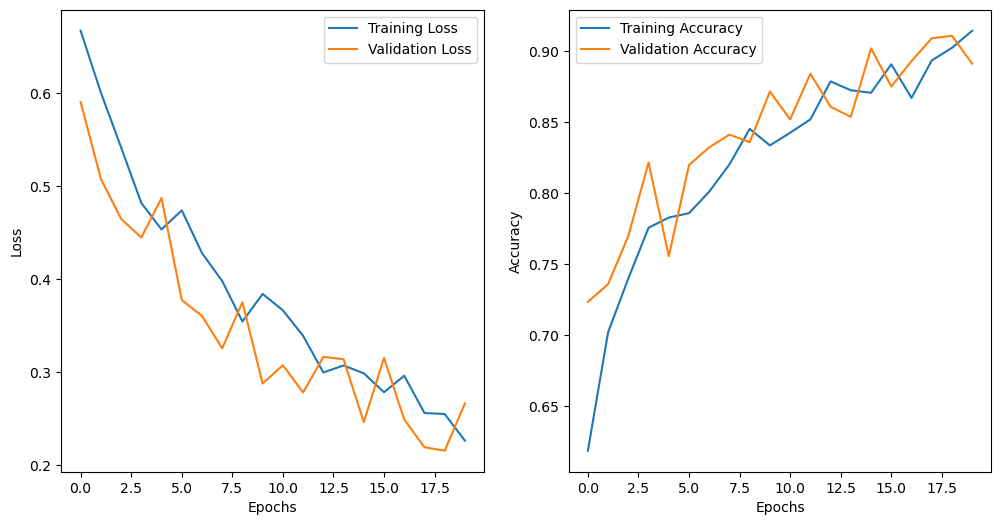

In [6]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Plot training and validation loss and accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()